Analyse für f(x) = sin(1/x)
----------------------------------------
Funktionswert bei x=0 ist definiert als: f(0) = nan
Untersuche den Grenzwert der Funktion für x -> 0...
  -> Ergebnis der Grenzwertberechnung: AccumBounds(-1, 1)

==> Ergebnis: Die Funktion ist NICHT stetig bei x = 0.
    (Der Grenzwert existiert nicht oder ist ungleich dem Funktionswert.)


Analyse für g(x) = x * sin(1/x)
----------------------------------------
Funktionswert bei x=0 ist definiert als: f(0) = nan
Untersuche den Grenzwert der Funktion für x -> 0...
  -> Ergebnis der Grenzwertberechnung: 0

==> Ergebnis: Die Funktion ist NICHT stetig bei x = 0.
    (Der Grenzwert existiert nicht oder ist ungleich dem Funktionswert.)


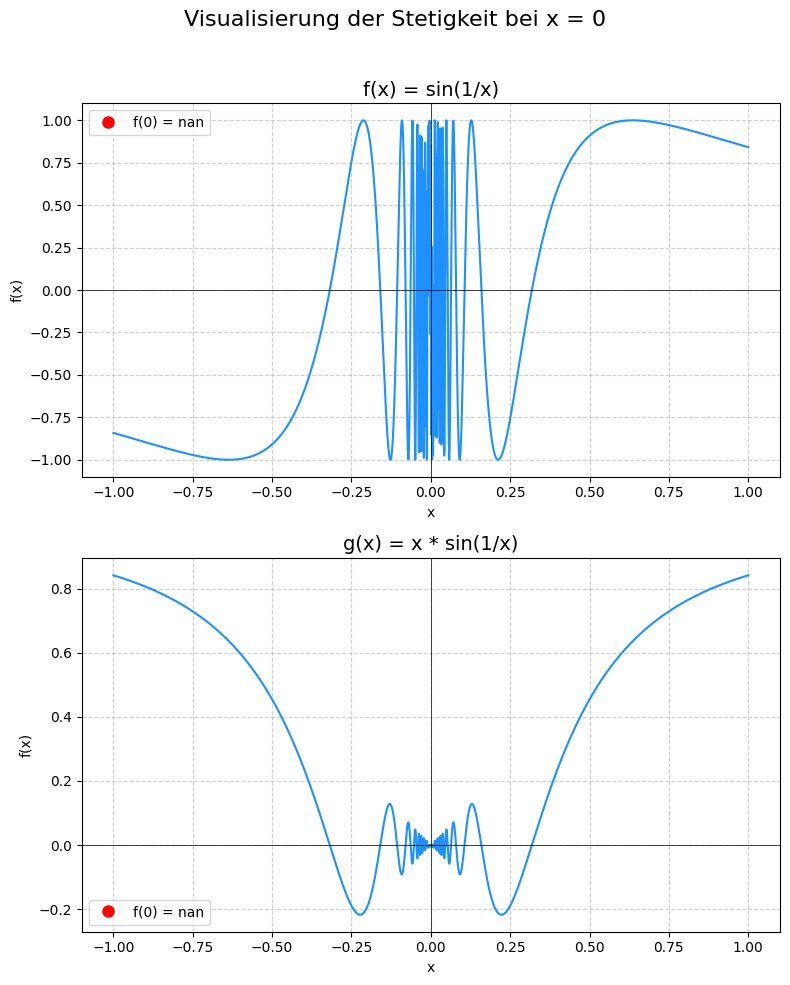

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def analysiere_stetigkeit_an_punkt(funktion, variable, punkt):
    """
    VERALLGEMEINERTE VERSION:
    Analysiert eine gegebene symbolische Funktion auf Stetigkeit an einem
    beliebigen Punkt 'punkt'.
    """
    try:
        # Den Funktionswert am Prüfpunkt direkt aus der Funktion holen
        funktionswert = funktion.subs(variable, punkt)
        print(f"Funktionswert bei x={punkt} ist definiert als: f({punkt}) = {funktionswert}")

        # Die Grenzwerte von links und rechts gegen den Prüfpunkt berechnen
        print(f"Untersuche den Grenzwert der Funktion für x -> {punkt}...")
        limit_links = sp.limit(funktion, variable, punkt, dir='-')
        limit_rechts = sp.limit(funktion, variable, punkt, dir='+')
        
        print(f"  -> Grenzwert von links: {limit_links}")
        print(f"  -> Grenzwert von rechts: {limit_rechts}")
        
        # Prüfe die Bedingung für Stetigkeit: Grenzwert muss existieren und gleich dem Funktionswert sein
        if limit_links == limit_rechts and limit_links == funktionswert:
            print(f"\n==> Ergebnis: Die Funktion IST stetig bei x = {punkt}.")
            print(f"    (Grenzwert von links = Grenzwert von rechts = Funktionswert: {limit_links} = {funktionswert})")
        else:
            print(f"\n==> Ergebnis: Die Funktion ist NICHT stetig bei x = {punkt}.")
            if limit_links != limit_rechts:
                print("    (Der Grenzwert von links ist ungleich dem Grenzwert von rechts.)")
            else:
                print(f"    (Der Grenzwert ({limit_links}) ist ungleich dem Funktionswert ({funktionswert}).)")
        return True # Analyse erfolgreich
    except Exception as e:
        print(f"Ein Fehler ist aufgetreten: {e}")
        return False # Analyse fehlgeschlagen

def plotte_funktion(ax, funktion_symbolisch, variable, punkt, titel):
    """
    Plottet eine symbolische Funktion zentriert um den Punkt 'punkt'.
    """
    f_numerisch = sp.lambdify(variable, funktion_symbolisch, 'numpy')

    # Erzeuge x-Werte in einem Bereich um den Prüfpunkt
    plot_bereich = 3
    x_werte_links = np.linspace(punkt - plot_bereich, punkt, 500, endpoint=False)
    x_werte_rechts = np.linspace(punkt, punkt + plot_bereich, 500, endpoint=False)
    
    ax.plot(x_werte_links, f_numerisch(x_werte_links), color='dodgerblue')
    ax.plot(x_werte_rechts, f_numerisch(x_werte_rechts), color='dodgerblue')
    
    # Hebe den Punkt (c, f(c)) hervor
    funktionswert_c = funktion_symbolisch.subs(variable, punkt)
    ax.plot(punkt, funktionswert_c, 'ro', markersize=8, label=f'f({punkt}) = {funktionswert_c}')
    
    ax.set_title(titel, fontsize=14)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5) # x=0 Achse bleibt
    ax.axvline(punkt, color='red', linestyle=':', linewidth=1) # Vertikale Linie am Prüfpunkt
    ax.legend()


# =============================================================
# --- HAUPTPROGRAMM ZUR LÖSUNG DER AUFGABEN ---
# =============================================================
if __name__ == "__main__":
    
    x = sp.Symbol('x')

    # --- Beispiel 1: Ihre ursprüngliche Aufgabe bei x = 0 ---
    print("### Beispiel 1: Stetigkeit von g(x) = x * sin(1/x) ###")
    g_x = sp.Piecewise((x * sp.sin(1/x), x != 0), (0, x == 0))
    analysiere_stetigkeit_an_punkt(g_x, x, punkt=0)
    
    print("\n" + "="*50 + "\n")
    
    # --- Beispiel 2: Neue Funktion mit Sprungstelle bei x = 2 ---
    print("### Beispiel 2: Eine Funktion mit einer Sprungstelle ###")
    h_x = sp.Piecewise((x + 1, x < 2), (x**2, x >= 2))
    analysiere_stetigkeit_an_punkt(h_x, x, punkt=2)
    
    # --- Gemeinsames Plotten ---
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
    fig.suptitle("Analyse von Stetigkeit an verschiedenen Punkten", fontsize=16)

    plotte_funktion(ax1, g_x, x, punkt=0, titel="g(x) = x * sin(1/x) bei x = 0")
    plotte_funktion(ax2, h_x, x, punkt=2, titel="h(x) bei x = 2")
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()